In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/1 (18).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/1 (4).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/2 (312).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/2 (306).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/1 (19).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/1 (25).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/2 (305).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/2 (290).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/1 (6).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/2 (291).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/1 (13).jpg
/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/2 (293).jpg
/kaggle/inpu

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
class OvarianNet(nn.Module):
    def __init__(self):
        super(OvarianNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 2)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        return x


In [7]:
class SequentialNet(nn.Module):
    def __init__(self):
        super(SequentialNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 28 * 28, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, 2)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [8]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_val_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [10]:
train_dataset = datasets.ImageFolder(root='/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/train', transform=transform_train)
val_dataset = datasets.ImageFolder(root='/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation', transform=transform_val_test)
test_dataset = datasets.ImageFolder(root='/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/test', transform=transform_val_test)


In [11]:
batch_size = 11
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [12]:
from torchvision.datasets import ImageFolder

transform_vis = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),  
])

In [14]:
train_dataset_vis = ImageFolder(root='/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/train', transform=transform_vis)

train_loader_vis = DataLoader(train_dataset_vis, batch_size=6, shuffle=True)

images, labels = next(iter(train_loader_vis))

class_labels = train_dataset_vis.classes


In [ ]:
def show_images(images, labels, class_labels):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (image, label) in enumerate(zip(images, labels)):
        image = image.permute(1, 2, 0)  
        axs[i].imshow(image)
        axs[i].set_title(f"Class: {class_labels[label]}")
        axs[i].axis('off')
    plt.show()

show_images(images, labels, class_labels)

num_epochs = 10
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()


In [16]:
from torchvision import datasets, transforms, models

In [17]:
models_to_compare = {
    "OvarianNet": OvarianNet(),
    "SequentialNet": SequentialNet(),
    "ResNet50": models.resnet50(),
    "DenseNet169": models.densenet169(),
    "MobileNet": models.mobilenet_v2()
}

In [18]:
train_accuracies_dict = {model_name: [] for model_name in models_to_compare}
val_accuracies_dict = {model_name: [] for model_name in models_to_compare}
test_accuracies_dict = {model_name: [] for model_name in models_to_compare}

In [19]:
def compute_accuracy(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

Training OvarianNet...
[Epoch 1/10] Train Acc: 86.60%, Val Acc: 89.66%, Test Acc: 88.06%
[Epoch 2/10] Train Acc: 86.74%, Val Acc: 88.79%, Test Acc: 88.39%
[Epoch 3/10] Train Acc: 87.29%, Val Acc: 86.21%, Test Acc: 82.58%
[Epoch 4/10] Train Acc: 87.71%, Val Acc: 83.62%, Test Acc: 87.10%
[Epoch 5/10] Train Acc: 87.57%, Val Acc: 87.07%, Test Acc: 88.39%
[Epoch 6/10] Train Acc: 88.95%, Val Acc: 88.79%, Test Acc: 86.45%
[Epoch 7/10] Train Acc: 87.85%, Val Acc: 86.21%, Test Acc: 88.71%
[Epoch 8/10] Train Acc: 86.74%, Val Acc: 88.79%, Test Acc: 85.48%
[Epoch 9/10] Train Acc: 86.46%, Val Acc: 87.07%, Test Acc: 87.42%
[Epoch 10/10] Train Acc: 88.40%, Val Acc: 87.93%, Test Acc: 85.48%


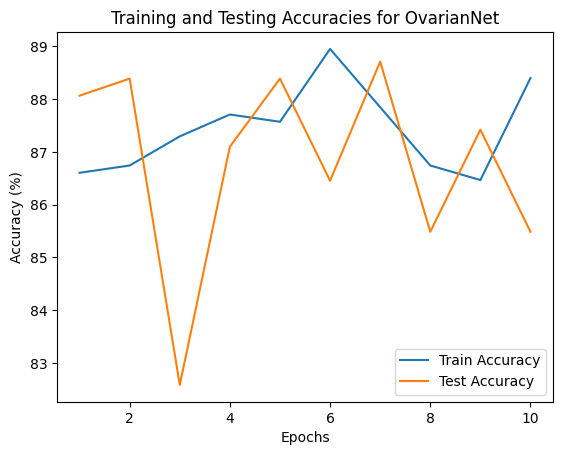

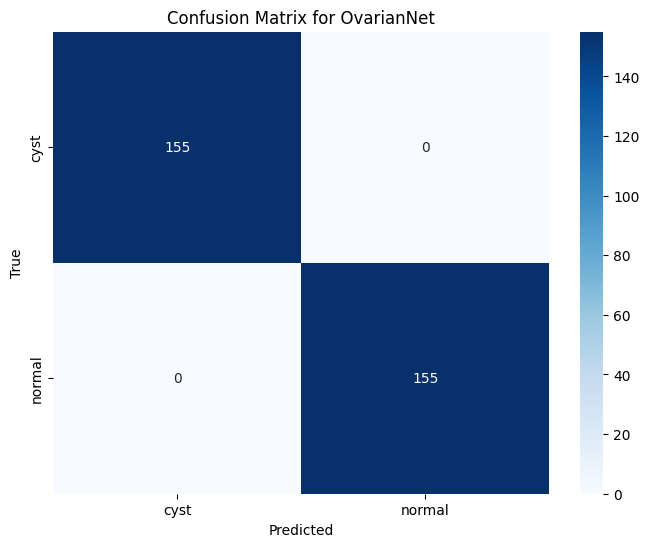

              precision    recall  f1-score   support

        cyst       1.00      1.00      1.00       155
      normal       1.00      1.00      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Training SequentialNet...
[Epoch 1/10] Train Acc: 95.17%, Val Acc: 100.00%, Test Acc: 99.03%
[Epoch 2/10] Train Acc: 99.72%, Val Acc: 99.14%, Test Acc: 100.00%
[Epoch 3/10] Train Acc: 98.90%, Val Acc: 100.00%, Test Acc: 99.68%
[Epoch 4/10] Train Acc: 99.59%, Val Acc: 100.00%, Test Acc: 100.00%
[Epoch 5/10] Train Acc: 100.00%, Val Acc: 100.00%, Test Acc: 100.00%
[Epoch 6/10] Train Acc: 100.00%, Val Acc: 100.00%, Test Acc: 100.00%
[Epoch 7/10] Train Acc: 100.00%, Val Acc: 100.00%, Test Acc: 100.00%
[Epoch 8/10] Train Acc: 100.00%, Val Acc: 100.00%, Test Acc: 100.00%
[Epoch 9/10] Train Acc: 100.00%, Val Acc: 100.00%, Test Acc: 100.00%
[Epoch 10/10] Train Acc: 100.00%,

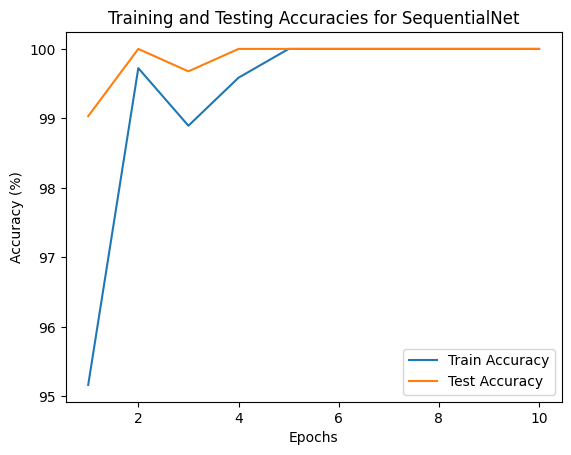

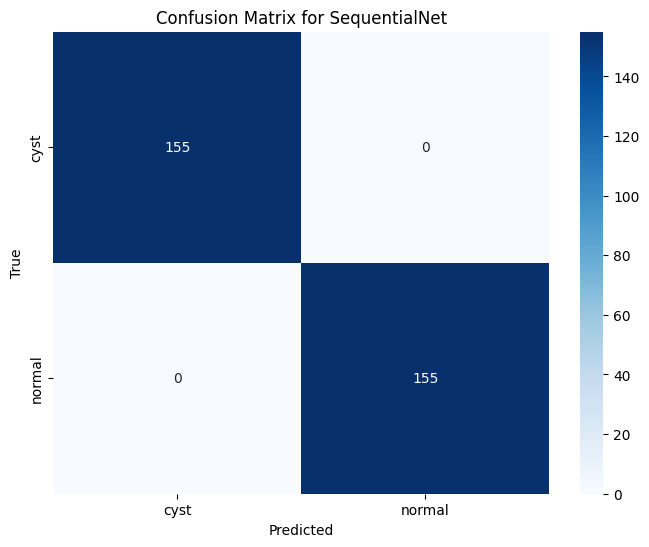

              precision    recall  f1-score   support

        cyst       1.00      1.00      1.00       155
      normal       1.00      1.00      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Training ResNet50...
[Epoch 1/10] Train Acc: 95.44%, Val Acc: 54.31%, Test Acc: 52.26%
[Epoch 2/10] Train Acc: 98.34%, Val Acc: 76.72%, Test Acc: 71.29%
[Epoch 3/10] Train Acc: 99.31%, Val Acc: 68.10%, Test Acc: 65.48%
[Epoch 4/10] Train Acc: 99.59%, Val Acc: 61.21%, Test Acc: 53.87%
[Epoch 5/10] Train Acc: 99.17%, Val Acc: 78.45%, Test Acc: 74.19%
[Epoch 6/10] Train Acc: 99.59%, Val Acc: 67.24%, Test Acc: 67.42%
[Epoch 7/10] Train Acc: 98.90%, Val Acc: 75.00%, Test Acc: 67.42%
[Epoch 8/10] Train Acc: 98.48%, Val Acc: 62.93%, Test Acc: 60.32%
[Epoch 9/10] Train Acc: 99.03%, Val Acc: 72.41%, Test Acc: 59.03%
[Epoch 10/10] Train Acc: 99.59%, Val Acc: 75.00%, Test Acc

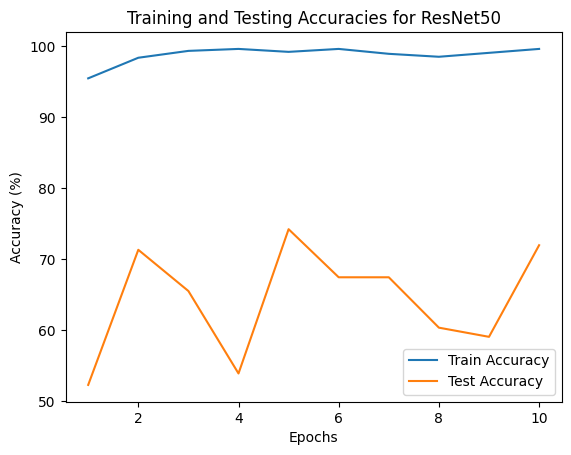

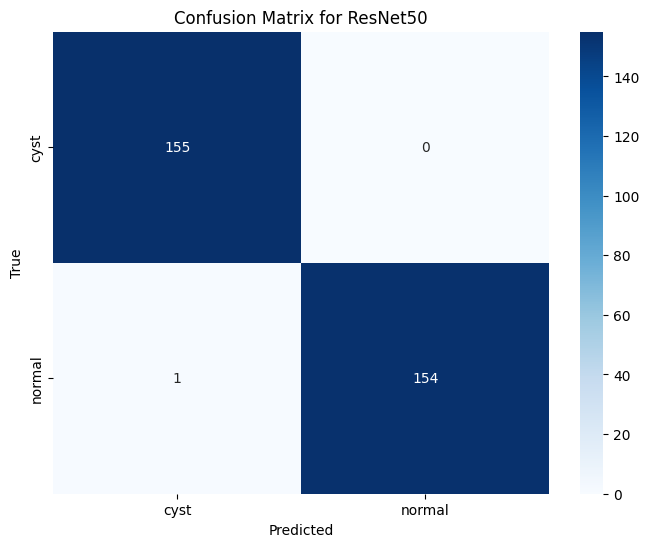

              precision    recall  f1-score   support

        cyst       0.99      1.00      1.00       155
      normal       1.00      0.99      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Training DenseNet169...
[Epoch 1/10] Train Acc: 95.58%, Val Acc: 57.76%, Test Acc: 53.55%
[Epoch 2/10] Train Acc: 99.45%, Val Acc: 55.17%, Test Acc: 53.23%
[Epoch 3/10] Train Acc: 99.45%, Val Acc: 66.38%, Test Acc: 60.00%
[Epoch 4/10] Train Acc: 99.45%, Val Acc: 62.07%, Test Acc: 57.10%
[Epoch 5/10] Train Acc: 99.72%, Val Acc: 75.86%, Test Acc: 71.61%
[Epoch 6/10] Train Acc: 99.86%, Val Acc: 70.69%, Test Acc: 62.58%
[Epoch 7/10] Train Acc: 100.00%, Val Acc: 64.66%, Test Acc: 62.58%
[Epoch 8/10] Train Acc: 100.00%, Val Acc: 66.38%, Test Acc: 62.58%
[Epoch 9/10] Train Acc: 100.00%, Val Acc: 69.83%, Test Acc: 66.45%
[Epoch 10/10] Train Acc: 98.76%, Val Acc: 62.07%, Te

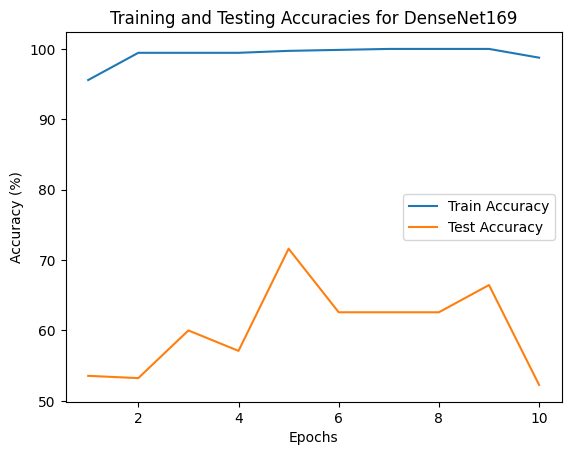

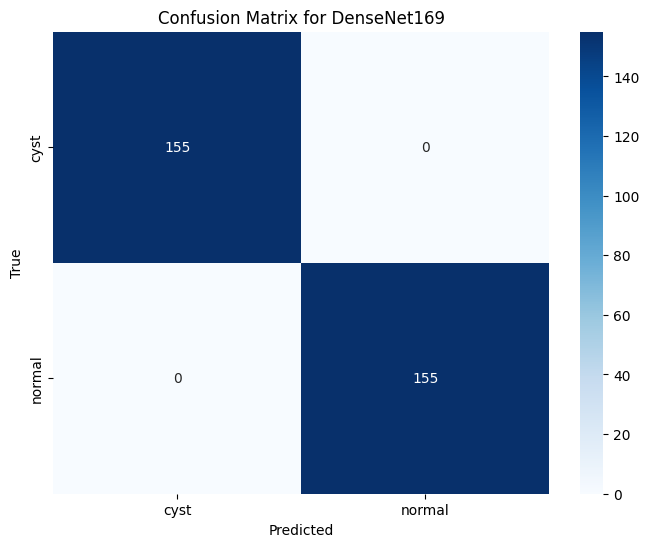

              precision    recall  f1-score   support

        cyst       1.00      1.00      1.00       155
      normal       1.00      1.00      1.00       155

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Training MobileNet...
[Epoch 1/10] Train Acc: 96.96%, Val Acc: 56.03%, Test Acc: 49.03%
[Epoch 2/10] Train Acc: 97.93%, Val Acc: 62.07%, Test Acc: 60.97%
[Epoch 3/10] Train Acc: 99.17%, Val Acc: 59.48%, Test Acc: 55.48%
[Epoch 4/10] Train Acc: 98.76%, Val Acc: 56.03%, Test Acc: 54.52%
[Epoch 5/10] Train Acc: 99.59%, Val Acc: 65.52%, Test Acc: 62.58%
[Epoch 6/10] Train Acc: 99.59%, Val Acc: 57.76%, Test Acc: 62.58%
[Epoch 7/10] Train Acc: 99.59%, Val Acc: 59.48%, Test Acc: 60.00%
[Epoch 8/10] Train Acc: 98.48%, Val Acc: 48.28%, Test Acc: 47.42%
[Epoch 9/10] Train Acc: 99.45%, Val Acc: 58.62%, Test Acc: 54.84%
[Epoch 10/10] Train Acc: 99.72%, Val Acc: 62.93%, Test Ac

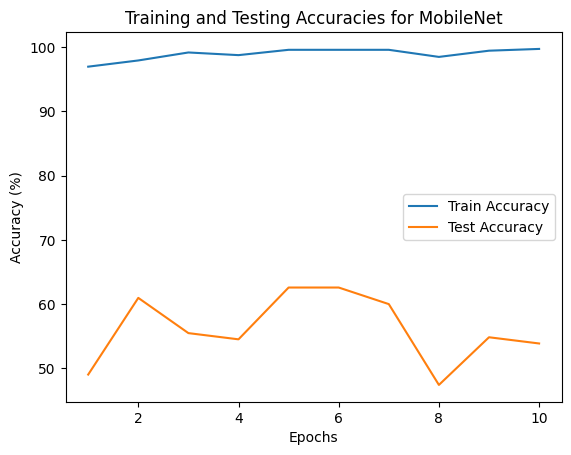

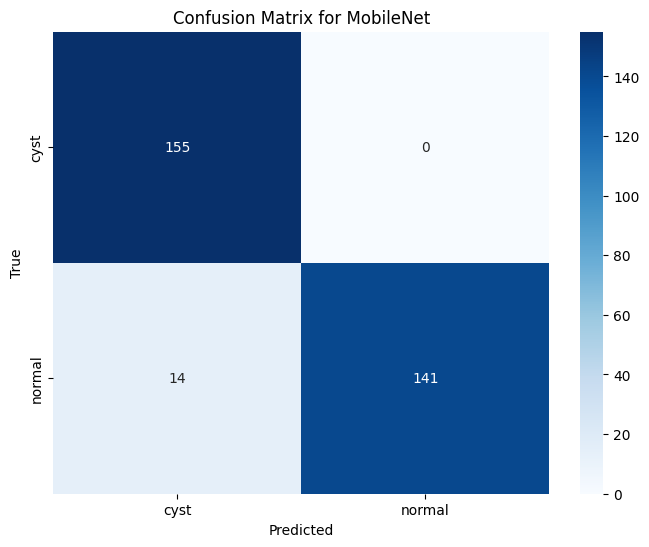

              precision    recall  f1-score   support

        cyst       0.92      1.00      0.96       155
      normal       1.00      0.91      0.95       155

    accuracy                           0.95       310
   macro avg       0.96      0.95      0.95       310
weighted avg       0.96      0.95      0.95       310



In [24]:
for model_name, model in models_to_compare.items():
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    print(f"Training {model_name}...")

    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)

        val_accuracy = compute_accuracy(model, val_loader)
        val_accuracies.append(val_accuracy)

        test_accuracy = compute_accuracy(model, test_loader)
        test_accuracies.append(test_accuracy)

        print(f"[Epoch {epoch + 1}/{num_epochs}] Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%")

    train_accuracies_dict[model_name] = train_accuracies
    val_accuracies_dict[model_name] = val_accuracies
    test_accuracies_dict[model_name] = test_accuracies

    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Training and Testing Accuracies for {model_name}')
    plt.legend()
    plt.show()

    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    print(classification_report(y_true, y_pred, target_names=test_dataset.classes, zero_division=1))


In [27]:
import cv2
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os

def preprocess_image(image_path, image_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (image_size, image_size))
    image = image.astype(np.float32) / 255.0
    image = torch.tensor(image.transpose(2, 0, 1))
    image = image.unsqueeze(0)
    return image

def predict_image(model, image):
    model.eval()
    with torch.no_grad():
        outputs = model(image)
        probabilities = F.softmax(outputs, dim=1)
    predicted_class = 'cyst' if probabilities[0][0] > 0.5 else 'normal'
    confidence = probabilities[0][0] if predicted_class == 'cyst' else 1 - probabilities[0][0]
    return predicted_class, confidence.item()

image_path = '/kaggle/input/ovarian-cyst-final/ovarian  cyst dataset/validation/cyst/1 (18).jpg'
image_size = 224
image = preprocess_image(image_path, image_size)

model = OvarianNet()
model_checkpoint_path = 'best_model.pth'

predicted_class, confidence = predict_image(model, image)
print("Predicted Class:", predicted_class)
print("Confidence:", confidence)

Predicted Class: cyst
Confidence: 0.5117436051368713


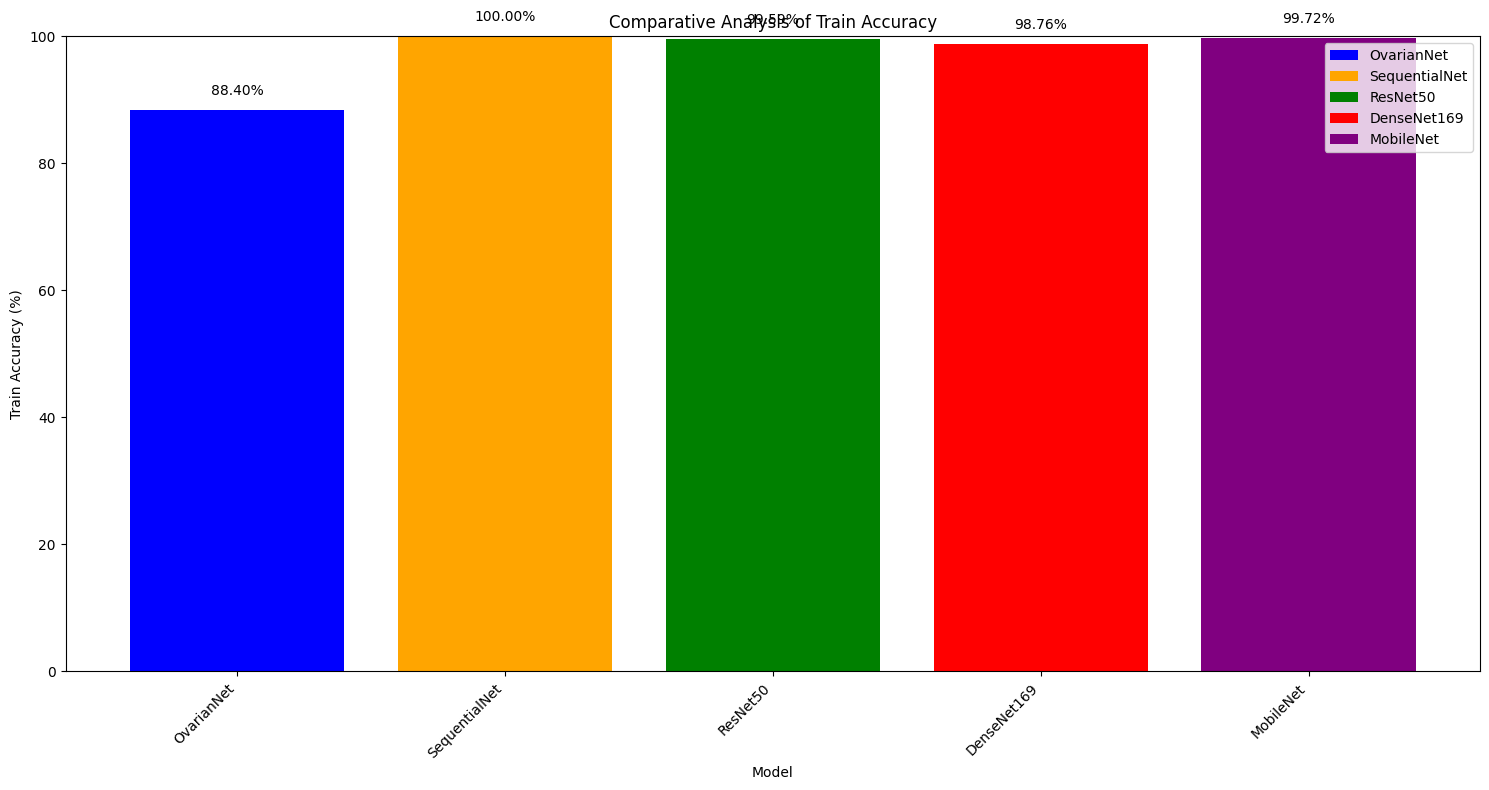

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

model_names = []
train_accuracies = []

for model_name in models_to_compare.keys():
    if model_name in train_accuracies_dict and train_accuracies_dict[model_name]:
        model_names.append(model_name)
        train_accuracy = train_accuracies_dict[model_name][-1]
        train_accuracies.append(train_accuracy)

        plt.text(model_names.index(model_name), train_accuracy + 2, f'{train_accuracy:.2f}%', ha='center', va='bottom')
    else:
        print(f"Train accuracies not recorded for model: {model_name}")

bars = plt.bar(model_names, train_accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Model')
plt.ylabel('Train Accuracy (%)')
plt.title('Comparative Analysis of Train Accuracy')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.legend(bars, model_names)

plt.tight_layout()
plt.show()